## 1. Data 소개 

+ Oxford Pet Dataset 
+ https://www.robots.ox.ac.uk/~vgg/data/pets/
---
+ 37가지 종류의 개와 고양이 
+ 각 클래스 마다 대략 200개씩의 이미지가 있다. 
+ 모든 이미지들은 head ROI, pixel level, trimap seefmentation의 정보를  가지고 있다. 
---
+ trimaps/
    - Segmentation 에 대한 정보 
    - 1 : foreground, 2: background, 3: 1과 2가 아닌 정보들 

+ list.txt
    - Classification 에 사용할 수 있는 데이터들이 labeling 되어 있다.
    
---

*. openCV  설치 
     pip install opencv-python

## 2.EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../data/annotations/list.txt',delimiter=' ',header=None,skiprows=6)# 정보도 같이 있기 때문에 몇줄 스킵해야함.
df.columns = ['file_name','id','species','breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [3]:
# 고양이와 강아지는 각각 몇마리씩인가? 
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


([<matplotlib.axis.XTick at 0x1985f5674c0>,
 [Text(0, 0, '1'), Text(1, 0, '2')])

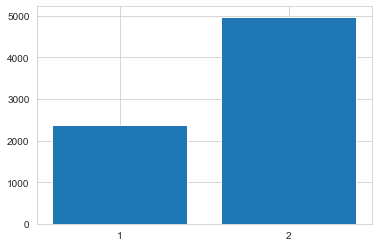

In [4]:
# 개와 고양이 이미지가 몇장씩 있나.
val_cnt=df['species'].value_counts().sort_index()
plt.bar(range(len(val_cnt)),val_cnt.values)
plt.xticks(range(len(val_cnt)),val_cnt.index.values)

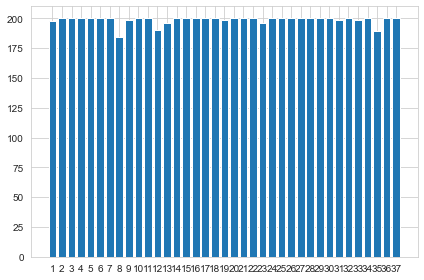

In [5]:
##### id 별 갯수 확인
val_id=df['id'].value_counts().sort_index()
plt.bar(range(len(val_id)),val_id.values)
plt.xticks(range(len(val_id)),val_id.index.values)

plt.tight_layout()

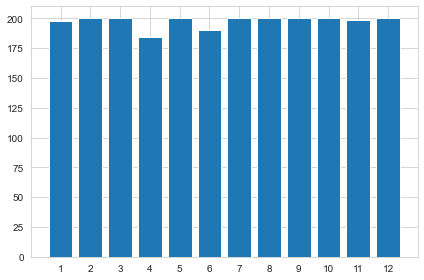

In [6]:
##### 고양이에 해당하는 breed 확인 
val_breed1=df[df['species']==1]['breed'].value_counts().sort_index()
plt.bar(range(len(val_breed1)),val_breed1.values)
plt.xticks(range(len(val_breed1)),val_breed1.index.values)

plt.tight_layout()

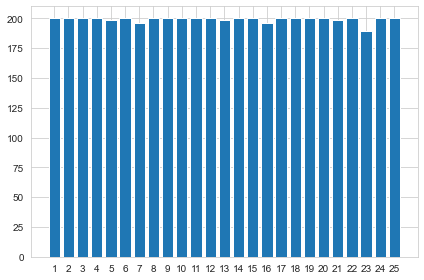

In [7]:
##### 강아지에 해당하는 breed 확인 
val_breed2=df[df['species']==2]['breed'].value_counts().sort_index()
plt.bar(range(len(val_breed2)),val_breed2.values)
plt.xticks(range(len(val_breed2)),val_breed2.index.values)

plt.tight_layout()

In [8]:
##### 바운딩 박스 확인 
import os 
from glob import glob # 파일 이름만 가져다가 그 이름에 해당하는 것을 파일을 가져오는 
image_dir = '../data/images/'
bbox_dir = './/data/annotations/xmls/'
seg_dir = '../data/annotations/trimaps/'

In [24]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

0

In [25]:
image_files[:10]

[]

In [26]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

0

In [ ]:
seg_files[:10]

In [27]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

0

In [ ]:
# annotation의 xmls 폴더의 파일을 복사해서 images폴에서 붙여넣기 

In [28]:
##### Head ROI 를 시각화  --> 빨간 박스 

import cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle




In [31]:
image_path = image_files[4]
bbox_path = image_path.replace(image_dir, bbox_dir).replace("jpg", "xml")

image = cv2.imread(image_path)
#open cv는 BGR로 저장하기에 원본 사진 색상이랑 다름. 바꿔 줘야함. 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

tree = et.parse(bbox_path)

xmin = float(tree.find("./object/bndbox/xmin").text)
xmax = float(tree.find("./object/bndbox/xmax").text)
ymin = float(tree.find("./object/bndbox/ymin").text)
ymax = float(tree.find("./object/bndbox/ymax").text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)

IndexError: list index out of range

In [9]:
##### 데이터 나누기

from sklearn.model_selection import KFold


In [11]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

df['fold']= -1
for idx, (t,v) in enumerate(kf.split(df),1):
    print(t,v,len(v))
    df.loc[v,'fold']=idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [12]:
df


,file_name,id,species,breed,fold
0,Abyssinian_100,1,1,1,1
1,Abyssinian_101,1,1,1,4
2,Abyssinian_102,1,1,1,4
3,Abyssinian_103,1,1,1,5
4,Abyssinian_104,1,1,1,5
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,2
7345,yorkshire_terrier_97,37,2,25,1
7346,yorkshire_terrier_98,37,2,25,4
7347,yorkshire_terrier_99,37,2,25,3


In [13]:
# annotation의 trimaps 폴더의 파일을 복사해서 images폴에서 붙여넣기 

In [ ]:
##### Segmentation 시각화

image_path = image_files[4]
seg_path = image_path.replace('jpg','png')

image = cv2.imread(image_path)
#open cv는 BGR로 저장하기에 원본 사진 색상이랑 다름. 바꿔 줘야함. 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

seg_map = cv2.imread(seg_path,cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(seg_map)

In [ ]:
##### 데이터 나누기 
from sklearn.model_selection import KFold


In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

df['fold']= -1
for idx, (t,v) in enumerate(kf.split(df),1):
    print(t,v,len(v))
    df.loc[v,'fold']=idx

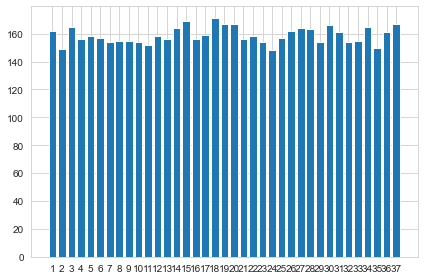

In [21]:
val_cnt=df[df['fold'] !=1]['id'].value_counts().sort_index()
plt.bar(range(len(val_cnt)),val_cnt.values)
plt.xticks(range(len(val_cnt)),val_cnt.index.values)

plt.tight_layout()

In [24]:
##### 고르게 분포시키기 위햄!!!!!!!!!!!!!!!!!!!!!!

from sklearn.model_selection import StratifiedKFold

In [23]:
?train_test_split
# stratify=None --> 이게 뭐냐하면 

In [28]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

df['fold']= -1
for idx, (t,v) in enumerate(skf.split(df,df['id']),1):
    print(t,v,len(v))
    df.loc[v,'fold']=idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


In [29]:
df

,file_name,id,species,breed,fold
0,Abyssinian_100,1,1,1,2
1,Abyssinian_101,1,1,1,3
2,Abyssinian_102,1,1,1,1
3,Abyssinian_103,1,1,1,4
4,Abyssinian_104,1,1,1,4
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,5
7345,yorkshire_terrier_97,37,2,25,1
7346,yorkshire_terrier_98,37,2,25,3
7347,yorkshire_terrier_99,37,2,25,5


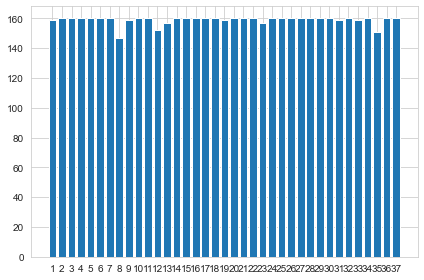

In [32]:
val_cnt=df[df['fold'] !=4]['id'].value_counts().sort_index()
plt.bar(range(len(val_cnt)),val_cnt.values)
plt.xticks(range(len(val_cnt)),val_cnt.index.values)

plt.tight_layout()

In [ ]:
df.to_csv('../data/kfolds.csv',index=False)